# Pertanyaan Analisis Video Game Sales
1. Platform apa yang paling banyak game nya?
2. Di PlayStation, Genre apa yang paling laku?
3. Di tahun PS2 paling banyak penjualan, platform apa yang menjadi saingan?
4. Di Jepang, Genre yang paling tinggi penjualannya dari genre apa?
5. Apa top 5 games paling banyak terjual di Eropa dari platform XBOX360

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vgsales = pd.read_csv('vgsales.csv')
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Jawab

## 1. Platform apa yang paling banyak game nya?

In [6]:
platform_counts = vgsales['Platform'].value_counts().reset_index()
platform_counts.head(10)

,Platform,count
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822


C:\Users\AUDIT-PC\AppData\Local\Temp\ipykernel_13380\144467246.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Platform', y='count', data=top_platforms, palette='viridis')


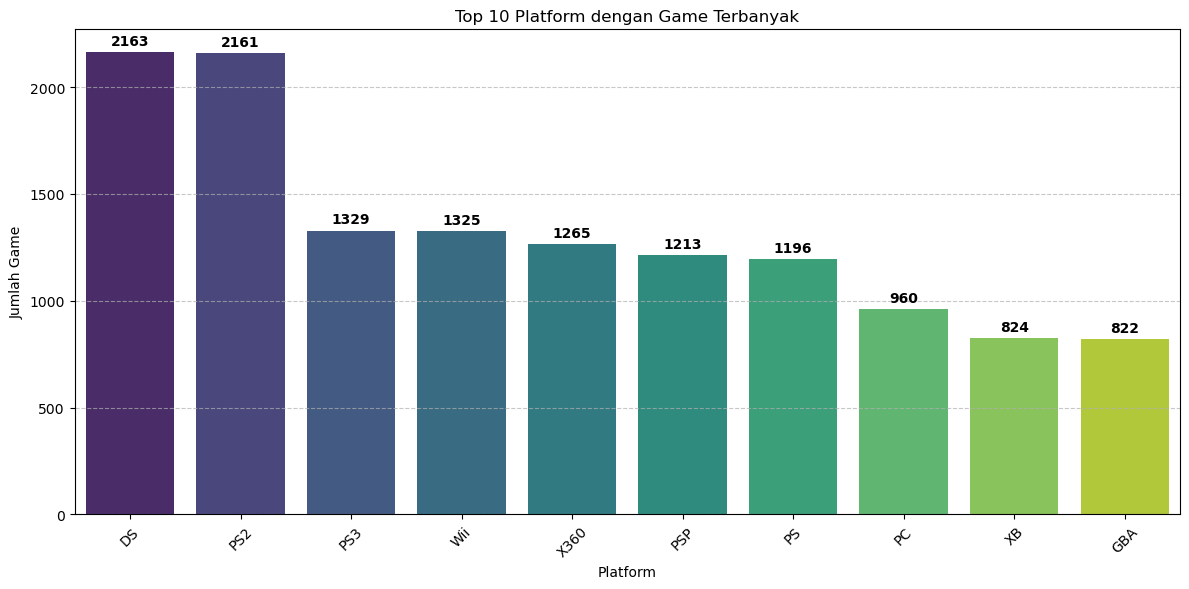

Platform dengan game terbanyak: DS dengan 2163 games


In [ ]:
plt.figure(figsize=(12,6))

top_platforms = platform_counts.head(10)

bar_plot = sns.barplot(x='Platform', y='count', data=top_platforms, palette='viridis')

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', padding=3, fontsize=10, fontweight='bold')

plt.title('Top 10 Platform dengan Game Terbanyak')
plt.xlabel('Platform')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Platform dengan game terbanyak: {platform_counts.iloc[0]['Platform']} dengan {platform_counts.iloc[0]['count']} games")

## 2. Di PlayStation, Genre apa yang paling laku?

In [9]:
playstation_data = vgsales[vgsales['Platform'].str.contains('PS', na=False)]
ps_genre_sales = playstation_data.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False)

print("Total penjualan per genre di platform PlayStation:")
ps_genre_sales

Total penjualan per genre di platform PlayStation:


,Genre,Global_Sales
0,Action,879.48
10,Sports,626.58
8,Shooter,443.58
6,Racing,382.63
7,Role-Playing,335.31
2,Fighting,250.14
3,Misc,220.43
4,Platform,194.37
9,Simulation,85.91
1,Adventure,84.60


C:\Users\AUDIT-PC\AppData\Local\Temp\ipykernel_13380\857251686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Genre', y='Global_Sales', data=ps_genre_sales, palette='coolwarm')


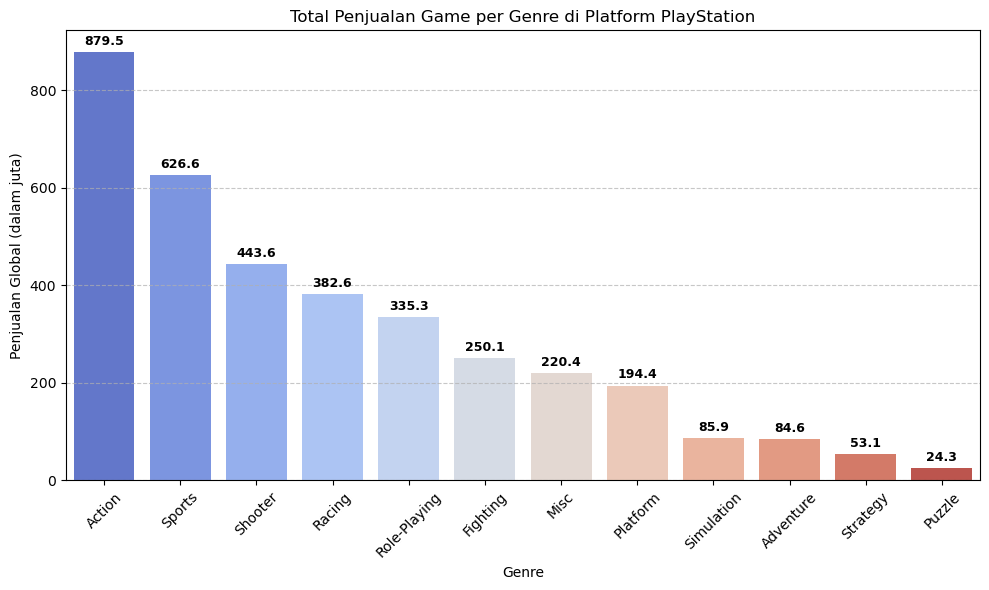

Genre paling laku di PlayStation: Action dengan penjualan 879.5 juta


In [10]:
plt.figure(figsize=(10,6))

bar_plot = sns.barplot(x='Genre', y='Global_Sales', data=ps_genre_sales, palette='coolwarm')

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f', padding=3, fontsize=9, fontweight='bold')

plt.title('Total Penjualan Game per Genre di Platform PlayStation')
plt.xlabel('Genre')
plt.ylabel('Penjualan Global (dalam juta)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Genre paling laku di PlayStation: {ps_genre_sales.iloc[0]['Genre']} dengan penjualan {ps_genre_sales.iloc[0]['Global_Sales']:.1f} juta")

## 3. Di tahun PS2 paling banyak penjualan, platform apa yang menjadi saingan?

In [12]:
ps2_data = vgsales[vgsales['Platform'] == 'PS2']
ps2_yearly = ps2_data.groupby('Year')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False)

peak_year = int(ps2_yearly.iloc[0]['Year'])
print(f"PS2 penjualan tertinggi di tahun: {peak_year}")

year_data = vgsales[vgsales['Year'] == peak_year]
platform_sales_year = year_data.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False)

platform_sales_year

PS2 penjualan tertinggi di tahun: 2004


,Platform,Global_Sales
4,PS2,211.78
1,GBA,78.09
6,XB,65.50
2,GC,28.89
0,DS,17.46
3,PC,10.46
5,PSP,7.13


C:\Users\AUDIT-PC\AppData\Local\Temp\ipykernel_13380\492528585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Platform', y='Global_Sales', data=top_platforms_year, palette='plasma')


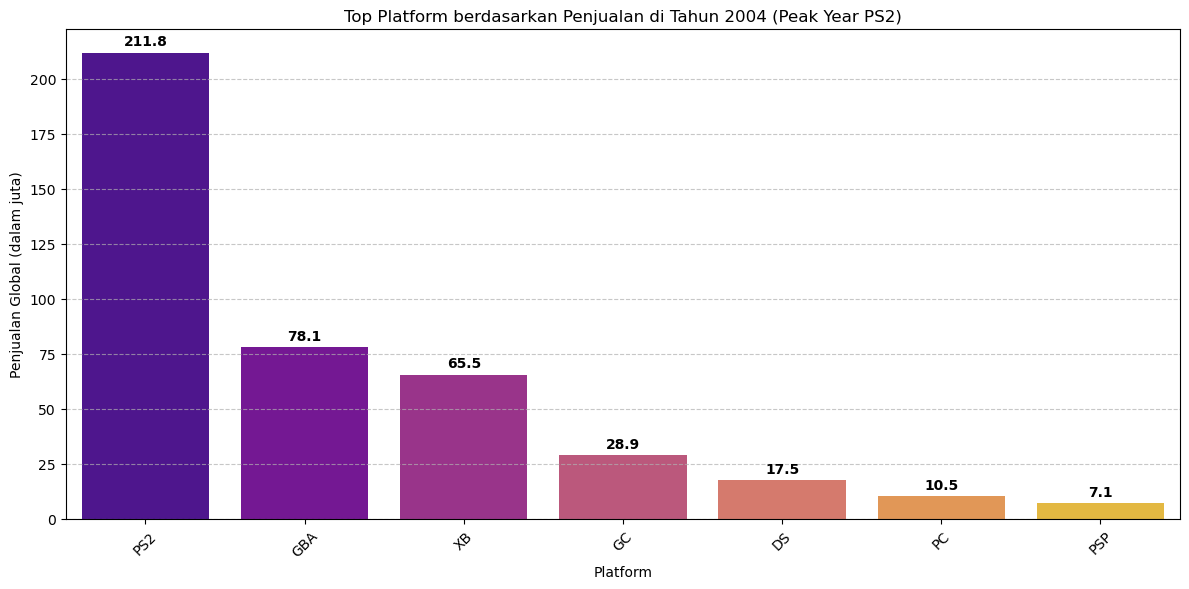


Saingan utama PS2 di tahun 2004:
- GBA: 78.1 juta
- XB: 65.5 juta
- GC: 28.9 juta
- DS: 17.5 juta


In [13]:
# Visualisasi saingan PS2 di tahun peak
plt.figure(figsize=(12,6))

top_platforms_year = platform_sales_year.head(8)
bar_plot = sns.barplot(x='Platform', y='Global_Sales', data=top_platforms_year, palette='plasma')

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f', padding=3, fontsize=10, fontweight='bold')

plt.title(f'Top Platform berdasarkan Penjualan di Tahun {peak_year} (Peak Year PS2)')
plt.xlabel('Platform')
plt.ylabel('Penjualan Global (dalam juta)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

competitors = platform_sales_year.head(5)
print(f"\nSaingan utama PS2 di tahun {peak_year}:")
for i, row in competitors.iterrows():
    if row['Platform'] != 'PS2':
        print(f"- {row['Platform']}: {row['Global_Sales']:.1f} juta")

## 4. Di Jepang, Genre yang paling tinggi penjualannya dari genre apa?

In [15]:
japan_genre = vgsales.groupby('Genre')['JP_Sales'].sum().reset_index().sort_values('JP_Sales', ascending=False)

japan_genre

,Genre,JP_Sales
7,Role-Playing,352.31
0,Action,159.95
10,Sports,135.37
4,Platform,130.77
3,Misc,107.76
2,Fighting,87.35
9,Simulation,63.70
5,Puzzle,57.31
6,Racing,56.69
1,Adventure,52.07


C:\Users\AUDIT-PC\AppData\Local\Temp\ipykernel_13380\4204258148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Genre', y='JP_Sales', data=japan_genre, palette='viridis')


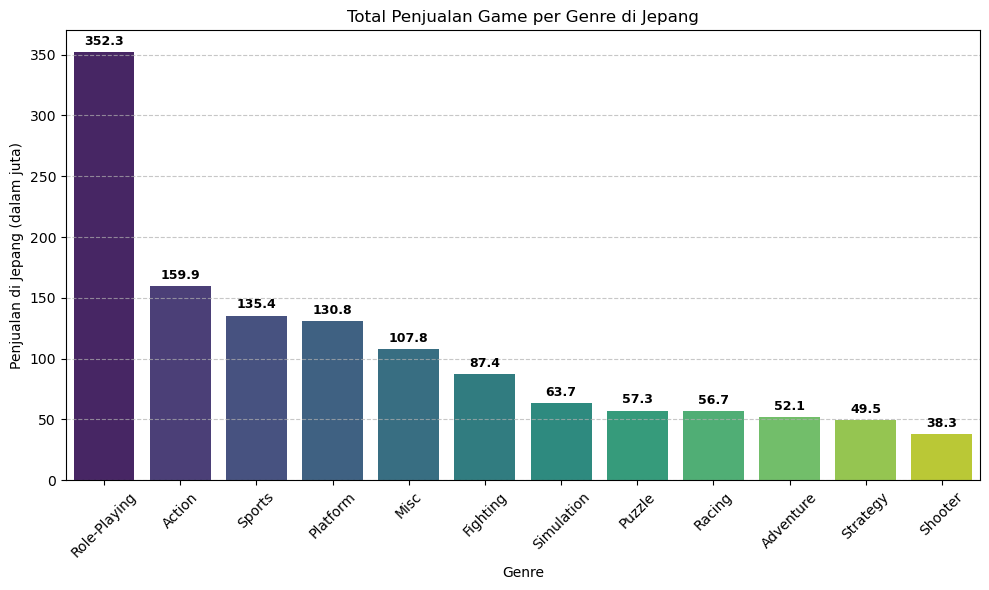

Genre dengan penjualan tertinggi di Jepang: Role-Playing dengan 352.3 juta


In [17]:
plt.figure(figsize=(10,6))

bar_plot = sns.barplot(x='Genre', y='JP_Sales', data=japan_genre, palette='viridis')

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f', padding=3, fontsize=9, fontweight='bold')

plt.title('Total Penjualan Game per Genre di Jepang')
plt.xlabel('Genre')
plt.ylabel('Penjualan di Jepang (dalam juta)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Genre dengan penjualan tertinggi di Jepang: {japan_genre.iloc[0]['Genre']} dengan {japan_genre.iloc[0]['JP_Sales']:.1f} juta")

## 5. Apa top 5 games paling banyak terjual di Eropa dari platform XBOX360

In [20]:
xbox360_data = vgsales[vgsales['Platform'] == 'X360']
top5_xbox_eu = xbox360_data.nlargest(5, 'EU_Sales').reset_index(drop=True)[['Name', 'Genre', 'EU_Sales', 'Global_Sales']]

top5_xbox_eu

,Name,Genre,EU_Sales,Global_Sales
0,Grand Theft Auto V,Action,5.31,16.38
1,Kinect Adventures!,Misc,4.94,21.82
2,Call of Duty: Black Ops II,Shooter,4.30,13.73
3,Call of Duty: Modern Warfare 3,Shooter,4.28,14.76
4,Call of Duty: Black Ops,Shooter,3.73,14.64


C:\Users\AUDIT-PC\AppData\Local\Temp\ipykernel_13380\2968229334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Name', y='EU_Sales', data=top5_xbox_eu, palette='coolwarm')


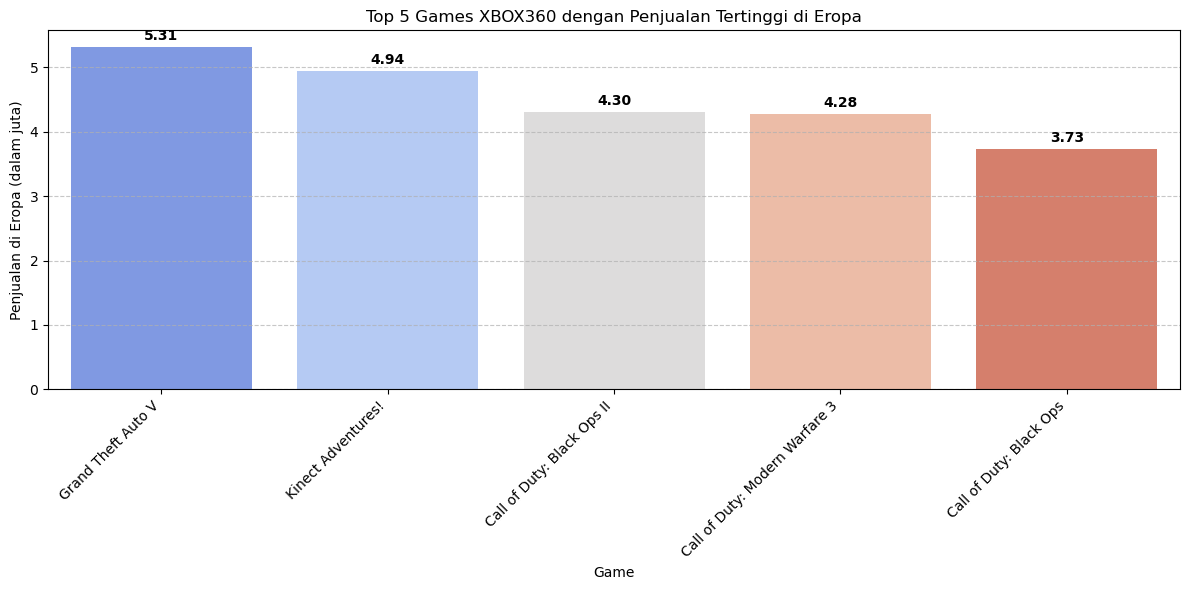


Game XBOX360 terlaris di Eropa: Grand Theft Auto V dengan 5.31 juta


In [21]:
# Visualisasi Top 5 games XBOX360 di Eropa
plt.figure(figsize=(12,6))

bar_plot = sns.barplot(x='Name', y='EU_Sales', data=top5_xbox_eu, palette='coolwarm')

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.2f', padding=3, fontsize=10, fontweight='bold')

plt.title('Top 5 Games XBOX360 dengan Penjualan Tertinggi di Eropa')
plt.xlabel('Game')
plt.ylabel('Penjualan di Eropa (dalam juta)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"\nGame XBOX360 terlaris di Eropa: {top5_xbox_eu.iloc[0]['Name']} dengan {top5_xbox_eu.iloc[0]['EU_Sales']:.2f} juta")

## Kesimpulan analisa
1. DS adalahah platform dengan jumlah game terbanyak, akan tetapi penjualan tertinggi dipegang oleh PS2. Untuk platform yang paling populer di variety games adalah nintendo.
2. DI global market untuk playstation genre action adalah yang paling laku, diikuti oleh sports dan misc. Dikarenakan kulturar preferensi di jepang malah role playing game yang paling laku sedangkan di eropa Sport sangat kuat untuk xbox 360 nya.
3. Pada 2004, PS2 mencapai puncak penjualan tertinggi. Pada tahun tersebut, platform saingan terdekat adalah XBOX dan GC (GameCube). Namun, PS2 tetap mendominasi pasar dengan penjualan yang jauh lebih tinggi dibandingkan platform lainnya.
4. Region insight, di jepang genre role playing game (RPG) adalah yang paling laku, diikuti oleh action dan misc. Hal ini menunjukkan preferensi unik pasar jepang terhadap genre RPG. Eropa lebih menyukai sport dan action. 
5. Implikasi bisnis untuk publisher game adalah memahami preferensi regional sangat penting untuk strategi pemasaran dan pengembangan produk. Misalnya, fokus pada genre RPG untuk pasar Jepang dan genre Sport untuk pasar Eropa dapat meningkatkan penjualan dan kepuasan pelanggan. Platform diversity jadi patokan untuk mitigasi risiko bisnis.